In [4]:
import re 
import numpy as np
import pandas as pd 
import matplotlib as mp 
from cleantext import clean
pd.set_option('display.max_colwidth', True)

Since the GPL-licensed package `unidecode` is not installed, using Python's `unicodedata` package which yields worse results.


Danish CPR numbers consist of a six-digit date (DDMMYY), followed by a 4 digit identifier (IIII). Using the re module, the task is to write and apply a regular expression that matches any CPR number, either in the DDMMYYIIII format, or in the DDMMYY-IIII format. The regular expression should contain four groups, such that the DD, MM, YY, and IIII parts can be extracted after matching.


In [5]:
text = '''adakaf
310702-7121
dad, 1001011110,fksfjwokff., 31314
222276-4390
1315208121
	'''
#A pattern that matches CPR in DDMMYYIIII format
# 
pattern= re.compile(r'(\d\d)(\d\d)(\d\d)-?(\d{4})')


In [6]:
match= pattern.finditer(text)
for x in match : 
        print(x.groups())
        dd = x.group(1)
        mm= x.group(2)
        yy =x.group(3)
        zz= x.group(4)
        print (yy)
        if '0'<=yy<='99' and '1'<=zz<='3999' :
            print ('Born in 1900')
    
        elif  '0'<=yy<='36' and '4000'<=zz<='4999' :
            print ('Born in 2000')
    
        elif  '37'<=yy<='99' and '4000'<=zz<='4999' :
            print ('Born in 1900')
    
        elif  '00'<=yy<='57' and '5000'<=zz<='8999' :
            print ('Born in 2000')
    
        elif  '58'<=yy<='99' and '5000'<=zz<='8999' :
            print ('Born in 1800')
        
        elif  '00'<yy<'36' and '9000'<zz<'9999' :
            print ('Born in 2000')
    
        elif  '37'<yy<'99' and '9000'<zz<'9999' :
            print ('Born in 1900')

('31', '07', '02', '7121')
02
Born in 2000
('10', '01', '01', '1110')
01
Born in 1900
('22', '22', '76', '4390')
76
Born in 1900
('13', '15', '20', '8121')
20
Born in 2000


Processing the FakeNewsCorpus data set

In [7]:
df = pd.read_csv('news_sample.csv') 
df.info()
df.head(5)
df.iloc[160, 5]

<class 'pandas.DataFrame'>
RangeIndex: 250 entries, 0 to 249
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        250 non-null    int64  
 1   id                250 non-null    int64  
 2   domain            250 non-null    str    
 3   type              238 non-null    str    
 4   url               250 non-null    str    
 5   content           250 non-null    str    
 6   scraped_at        250 non-null    str    
 7   inserted_at       250 non-null    str    
 8   updated_at        250 non-null    str    
 9   title             250 non-null    str    
 10  authors           170 non-null    str    
 11  keywords          0 non-null      float64
 12  meta_keywords     250 non-null    str    
 13  meta_description  54 non-null     str    
 14  tags              27 non-null     str    
 15  summary           0 non-null      float64
dtypes: float64(2), int64(2), str(12)
memory usage: 31.4 KB


'Worldwide Laser Technology Market Analysis Report 2020 – Challenges & Opportunities\n\nHeadline: Bitcoin & Blockchain Searches Exceed Trump! Blockchain Stocks Are Next!\n\nNew Market Research Report on “Laser Technology Market by Type (Solid – YAG laser, Fiber laser, Thin Disk Laser, Liquid, Gas – Argon Ion Laser, Excimer, CO2& Others), Application (Medical, Industrial, Military, Research, Consumer, & Others), and Geography – Trends & Forecast to 2013 – 2020adds to ReportsnReports.com.\n\nLASER (Light Amplification by Simulated Emission of Radiation) technology has been used forvarious applications such as medical, industrial, military, research, commercial, consumer, automotive, and communication. The purpose of these applications is either scientific/laboratory experiments or the measurement/exploration of distances. Lasers have become robust, compact, and versatile with technological developments. These developments have triggered the commercial and industrial applications.\n\nThis

In [8]:
# Most of these expression was taken from stack overflow
# I used pandas to read the csv file, that forced me to using str. method, that turns a series into a string, if 
#x.str..... (pandas method)
## Vectorization : This design proccesses the whole series rather than a single string, I could have used the 'apply()' method which loops through each row, but this method is faster
## .apply() method : A hidden for-loop that iterates through each (column)
def clean_text(series):
    series = series.str.lower()
    series = series.str.replace(r'https?://\S+|www\.\S+', '<URL>', regex=True)
    series = series.str.replace(r'[\w.-]+@[\w]+\.[\w]+', '<EMAIL>' ,regex=True)
    series = series.str.replace(r'\d{2,4}[-/]\d{2,4}[-/]\d{2,4}', '<DATE>', regex=True)
    #series = series.str.replace(r'\d{1,2}/\d{1,2}/\d{2,4}', '<DATE>', regex=True)
    series = series.str.replace(r'\d+', '<NUM>', regex=True)    
    series = series.str.replace(r'\s+', ' ', regex=True)
    series = series.str.replace(r'[^\w\s<>]', ' ', regex=True)
    series = series.str.replace(r'\s+', ' ', regex=True)
    series = series.str.strip()
    return series

df['clean_txt'] = clean_text(df['content'])

df.iloc[160, 16]

'worldwide laser technology market analysis report <NUM> challenges opportunities headline bitcoin blockchain searches exceed trump blockchain stocks are next new market research report on laser technology market by type solid yag laser fiber laser thin disk laser liquid gas argon ion laser excimer co<NUM> others application medical industrial military research consumer others and geography trends forecast to <NUM> <NUM>adds to reportsnreports com laser light amplification by simulated emission of radiation technology has been used forvarious applications such as medical industrial military research commercial consumer automotive and communication the purpose of these applications is either scientific laboratory experiments or the measurement exploration of distances lasers have become robust compact and versatile with technological developments these developments have triggered the commercial and industrial applications this laser technology market report is segmented on the basis of 

In [9]:
## .sub is a regex methods that handles strings, not a series, a different approach to cleaning
text = '''Hello how are you www.google.com    akdad@outlook.com
ajfnwjef-as1231@gas.net12/21/2012,
2002-21-21,   12-21-2002 KAKAKAKAKAKA
adkafaf .
'''
def clean_row(text):
    # 1. Ensure it's a string (handles NaN)
    text = str(text).lower()
    
    # 2. Use re.sub() instead of .str.replace()
    # Replace URLs
    text = re.sub(r'https?://\S+|www\.\S+', '<URL>', text)
    # Replace Emails
    text = re.sub(r'[\w.-]+@[\w]+\.[\w]+', '<EMAIL>', text)
    # Replace Dates
    text = re.sub(r'\d{2,4}[-/]\d{2,4}[-/]\d{2,4}', '<DATE>', text)
    # Replace Numbers
    text = re.sub(r'\d+', '<NUM>', text)
    
    # 3. Remove punctuation and extra whitespace
    text = re.sub(r'[^\w\s<>]', ' ', text) # Keeps <URL>, <NUM>, etc.
    text = re.sub(r'\s+', ' ', text)
    
    return text.strip()
print (clean_row(text))
print(clean_text(pd.Series([text])))

hello how are you <URL> <EMAIL> <EMAIL> <NUM> <NUM> <DATE> <DATE> kakakakakaka adkafaf
0    hello how are you <URL> <EMAIL> <EMAIL> <NUM> <NUM> <DATE> <DATE> kakakakakaka adkafaf
dtype: str


In [10]:
clean_text(df['clean_txt'])


0      sometimes the power of christmas will make you do wild and wonderful things you do not need to believe in the holy trinity to believe in the positive power of doing good for others the simple act of giving without receiving is lost on many of us these days as worries about money and success hold us back from giving to others who are in need one congregation in ohio was moved to action by the power of a sermon given at their church on christmas eve the pastor at grand lake united methodist church in celina ohio gave an emotional sermon about the importance of understanding the message of jesus for many religious people the message of jesus is to help others before yourself to make sure the people who are suffering get the help they need to enjoy life a little bit the sermon was really about generosity and what that can look like in our lives jesus lived a long time ago and he acted generously in the fashion of his time but what would a generous act look like in our times that was

In [11]:
df['content'] = df['content'].apply(lambda x: clean(x,
	fix_unicode=True,               # fix various unicode errors
    lower=True,                     # lowercase text
    no_line_breaks=False,           # fully strip line breaks as opposed to only normalizing them
    no_urls=False,                  # replace all URLs with a special token
    no_emails=False,                # replace all email addresses with a special token
    no_numbers=False,               # replace all numbers with a special token
    no_digits=False,                # replace all digits with a special token
    no_punct=False,                 # remove punctuations
    replace_with_punct="",          # instead of removing punctuations you may replace them
    replace_with_url="<URL>",
    replace_with_email="<EMAIL>",
    replace_with_phone_number="<PHONE>",
    replace_with_ip_address="<IP>",
    replace_with_number="<NUM>",
    replace_with_digit="0",
    lang="en"
))


print (df['content'])

0      sometimes the power of christmas will make you do wild and wonderful things. you do not need to believe in the holy trinity to believe in the positive power of doing good for others. the simple act of giving without receiving is lost on many of us these days, as worries about money and success hold us back from giving to others who are in need. one congregation in ohio was moved to action by the power of a sermon given at their church on christmas eve. the pastor at grand lake united methodist church in celina, ohio gave an emotional sermon about the importance of understanding the message of jesus.\nfor many religious people the message of jesus is to help others before yourself, to make sure the people who are suffering get the help they need to enjoy life a little bit. the sermon was really about generosity and what that can look like in our lives. jesus lived a long time ago and he acted generously in the fashion of his time but what would a generous act look like in our tim

Most Frequent words before removing stop-words 


Unique words BEFORE cleaning: 26546
Unique words AFTER cleaning:  15373
Reduction in vocabulary:      11173 words


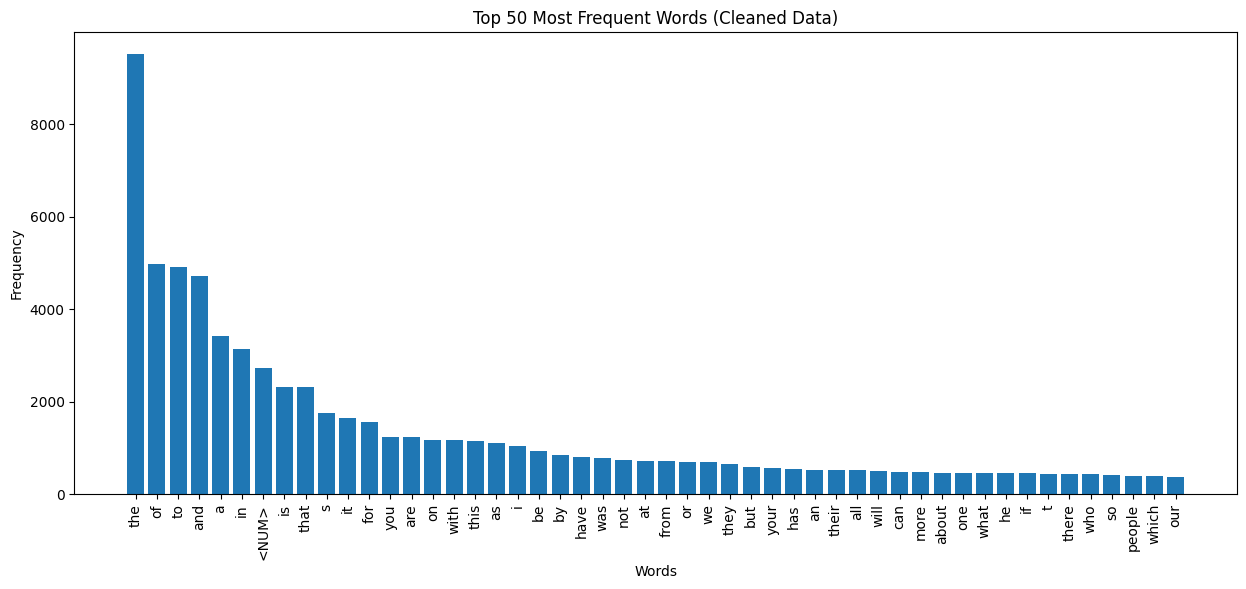

In [14]:
import matplotlib.pyplot as plt
from collections import Counter

# 1. Tokenize (split into words)
# We use simple whitespace splitting for a fair comparison
raw_words = df['content'].str.split().explode()
clean_words = df['clean_txt'].str.split().explode()

# 2. Calculate Unique Words (Vocabulary Size)
vocab_raw = len(set(raw_words))
vocab_clean = len(set(clean_words))

print(f"Unique words BEFORE cleaning: {vocab_raw}")
print(f"Unique words AFTER cleaning:  {vocab_clean}")
print(f"Reduction in vocabulary:      {vocab_raw - vocab_clean} words")

# 3. Calculate Frequency of Cleaned Words
# Counter creates a dictionary like {'the': 500, 'news': 120, ...}
word_counts = Counter(clean_words)

# Get the 50 most common words
top_50 = word_counts.most_common(50)

# Separate words and counts for plotting
words = [x[0] for x in top_50]
counts = [x[1] for x in top_50]

# 4. Plotting
plt.figure(figsize=(15, 6))  # Make the chart wide enough
plt.bar(words, counts)
plt.xticks(rotation=90)      # Rotate labels so they don't overlap
plt.title("Top 50 Most Frequent Words (Cleaned Data)")
plt.xlabel("Words")
plt.ylabel("Frequency")
plt.show()

Lets remove stop-words

In [ ]:
# First i define a list of stop words
stop_words = [
    "the", "of", "to", "and", "a", "in", "is", "that", "for", "are", 
    "it", "with", "on", "as", "this", "you", "be", "by", "i", "have",
    "was", "not", "from", "at", "or", "they", "but", "we", "your", 
    "has", "an", "their", "will", "all","us" ,"more", "can", "about", "if", 
    "he", "who", "what", "one", "which", "our", "were", "his", "been", "so", "like", "s", "t", "there","there", "these","do", "would","its", "when", "being", "even", "next", 
    "over", "after", "them", "think", "had", "how","new","also", "some","up","out", "time","people","no", "\<NUM\>" ]
# Spilt text/string into a list of words : 
def remove_stop (text, stop_words) : 
    string_to_words = str(text)
    pattern = re.compile(r'\b(' + '|'.join(stop_words) + r')\b')
    clean_text = pattern.sub('', text)
    # 3. Clean up the messy white space left behind (double spaces, tabs, etc.)
    return re.sub(r'\s+', ' ', clean_text).strip()    

# Assuming your text column is named 'content'
# We use a lambda to pass both the cell value and your stop_words list
df['clean_txt'] = df['clean_txt'].apply(lambda x: remove_stop(x, stop_words))

df['clean_txt']




<>:8: SyntaxWarning: "\<" is an invalid escape sequence. Such sequences will not work in the future. Did you mean "\\<"? A raw string is also an option.
<>:8: SyntaxWarning: "\<" is an invalid escape sequence. Such sequences will not work in the future. Did you mean "\\<"? A raw string is also an option.
/tmp/ipykernel_84074/2750531289.py:8: SyntaxWarning: "\<" is an invalid escape sequence. Such sequences will not work in the future. Did you mean "\\<"? A raw string is also an option.
  "over", "after", "them", "think", "had", "how","new","also", "some","up","out", "time","people","no", "\<NUM\>" ]


0      sometimes power christmas make wild wonderful things need believe holy trinity believe positive power doing good others simple act giving without receiving lost many days worries money success hold back giving others need congregation ohio moved action power sermon given church christmas eve pastor grand lake united methodist church celina ohio gave emotional sermon importance understanding message jesus many religious message jesus help others before yourself make sure suffering get help need enjoy life little bit sermon really generosity look lives jesus lived long ago acted generously fashion generous act look times focus sermon potency sermon lost congregation moved take action sermon ended congregation decided take offering bowl passed around room everyone pitched could christmas eve words sermon still ringing ears did offering members congregation drove down local waffle house visit ladies working night shift great choice most holy days everyone should families ladies work

In [ ]:
	import matplotlib.pyplot as plt
	from collections import Counter

	# 1. Tokenize (split into words)
	# We use simple whitespace splitting for a fair comparison
	raw_words = df['content'].str.split().explode()
	clean_words = df['clean_txt'].str.split().explode()

	# 2. Calculate Unique Words (Vocabulary Size)
	vocab_raw = len(set(raw_words))
	vocab_clean = len(set(clean_words))

	print(f"Unique words BEFORE cleaning: {vocab_raw}")
	print(f"Unique words AFTER cleaning:  {vocab_clean}")
	print(f"Reduction in vocabulary:      {vocab_raw - vocab_clean} words")

	# 3. Calculate Frequency of Cleaned Words
	# Counter creates a dictionary like {'the': 500, 'news': 120, ...}
	word_counts = Counter(clean_words)

	# Get the 50 most common words
	top_50 = word_counts.most_common(50)

	# Separate words and counts for plotting
	words = [x[0] for x in top_50]
	counts = [x[1] for x in top_50]

	# 4. Plotting
	plt.figure(figsize=(15, 6))  # Make the chart wide enough
	plt.bar(words, counts)
	plt.xticks(rotation=90)      # Rotate labels so they don't overlap
	plt.title("Top 50 Most Frequent Words (Cleaned Data)")
	plt.xlabel("Words")
	plt.ylabel("Frequency")
	plt.show()

IndentationError: unexpected indent (1884376741.py, line 6)

In [ ]:
#Replacing number with <NUM>

